# 十五.图像的灰度线性变换

1.图像灰度上移变换：DB=DA+50

2.图像对比度增强变换：DB=DA*1.5

3.图像对比度减弱变换：DB=DA*0.8

4.图像灰度反色变换：DB=255-DAPS


## 15.1.图像灰度线性变换原理

图像的灰度线性变换是通过建立灰度映射来调整原始图像的灰度，从而改善图像的质量，凸显图像的细节，提高图像的对比度。

灰度线性变换的计算公式如下所示：该公式中DB表示灰度线性变换后的灰度值，DA表示变换前输入图像的灰度值，α和b为线性变换方程f(D)的参数，分别表示斜率和截距。
当α=1，b=0时，保持原始图像当α=1，b!=0时，图像所有的灰度值上移或下移当α=-1，b=255时，原始图像的灰度值反转当α>1时，输出图像的对比度增强当0<α<1时，输出图像的对比度减小当α<0时，原始图像暗区域变亮，亮区域变暗，图像求补


(1) 浮点算法：Gray=R0.3+G0.59+B0.11


(2) 整数方法：Gray=(R30+G59+B11)/100

(3) 移位方法：Gray=(R28+G151+B77)>>8;

(4) 平均值法：Gray=（R+G+B）/3;(此程序采用算法)

(5) 仅取绿色：Gray=G；

(6) 加权平均值算法：根据光的亮度特性，公式: R=G=B=R0.299+G*0.587+B0.144

        通过上述任一种方法求得Gray后，将原来的RGB(R,G,B)中的R,G,B统一用Gray替换，形成新的颜色RGB(Gray,Gray,Gray)，用它替换原来的RGB(R,G,B)就是灰度图了。改变象素矩阵的RGB值，来达到彩色图转变为灰度图。


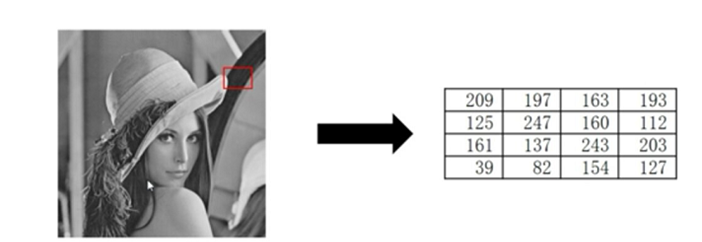

如图所示，显示了图像的灰度线性变换对应的效果图。


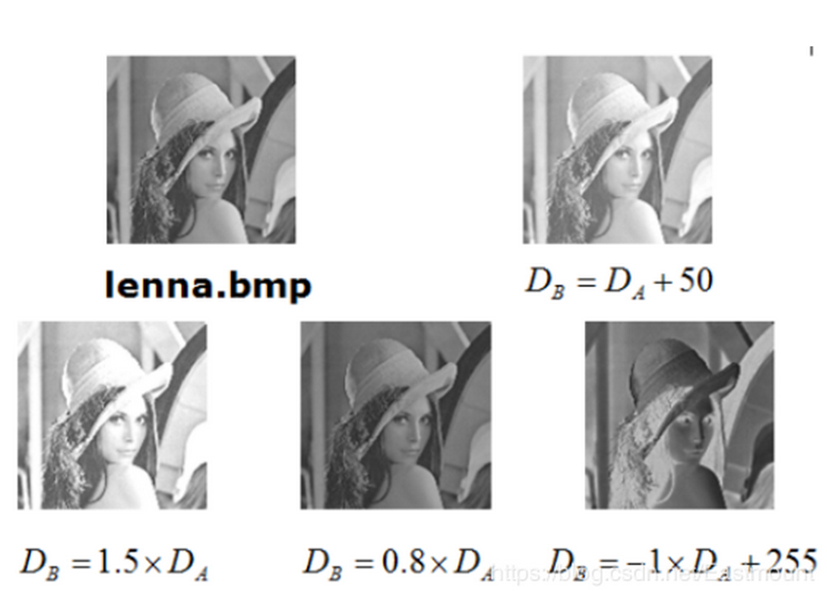

## 15.2.图像灰度上移变换

该算法将实现图像灰度值的上移，从而提
升图像的亮度，其实现代码如下所示。由
于图像的灰度值位于0至255区间之内，所
以需要对灰度值进行溢出判断。


In [2]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度上移变换 DB=DA+50
for i in range(height):
    for j in range(width):
        
        if (int(grayImage[i,j]+50) > 255):
            gray = 255
        else:
            gray = int(grayImage[i,j]+50)
            
        result[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


其输出结果如上图所示，图像
的所有灰度值上移50，图像变
得更白了。注意，纯黑色对应
的灰度值为0，纯白色对应的灰
度值为255。


## 15.3.图像对比度增强变换

该算法将增强图像的对比度，Python实现代码如下所示：


In [3]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
grayImage = cv2.imread("test.jpg",cv2.IMREAD_GRAYSCALE)
# grayImage = cv2.imread('lufan.jpg')

#图像灰度转换
# grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像对比度增强变换 DB=DA*1.5
for i in range(height):
    for j in range(width):
        if (int(grayImage[i,j]*1.5) > 255):
            gray = 255
        else:
            gray = int(grayImage[i,j]*1.5)
            
        result[i,j] = np.uint8(gray)

# 显示图像
# cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()




其输出结果如上图所示，图像的所有灰度值增强1.5倍。

## 15.4.图像对比度减弱变换

该算法将减弱图像的对比度，Python实现代码如下所示：



In [ ]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像对比度减弱变换 DB=DA*0.8
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j]*0.8)
        result[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


其输出结果如上图所示，图像的所有灰度值减弱，图像变得更暗

## 15.5.图像灰度反色变换

反色变换又称为线性灰度求补变换，它是对原图像的像素值进行反转，即黑色变为白色，白色变为黑色的过程。其Python实现代码如下所示：


In [4]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度反色变换 DB=255-DA
for i in range(height):
    for j in range(width):
        gray = 255 - grayImage[i,j]
        result[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()
#图像缩放
result = cv2.resize(result, None, fx=0.3, fy=0.3)
cv2.imwrite("lufanhei.jpg", result)



True

其输出结果如上图所示，图像处理前后的灰度值是互补的。


图像灰度反色变换在医学图像处理中有一定的应用，如下图所示


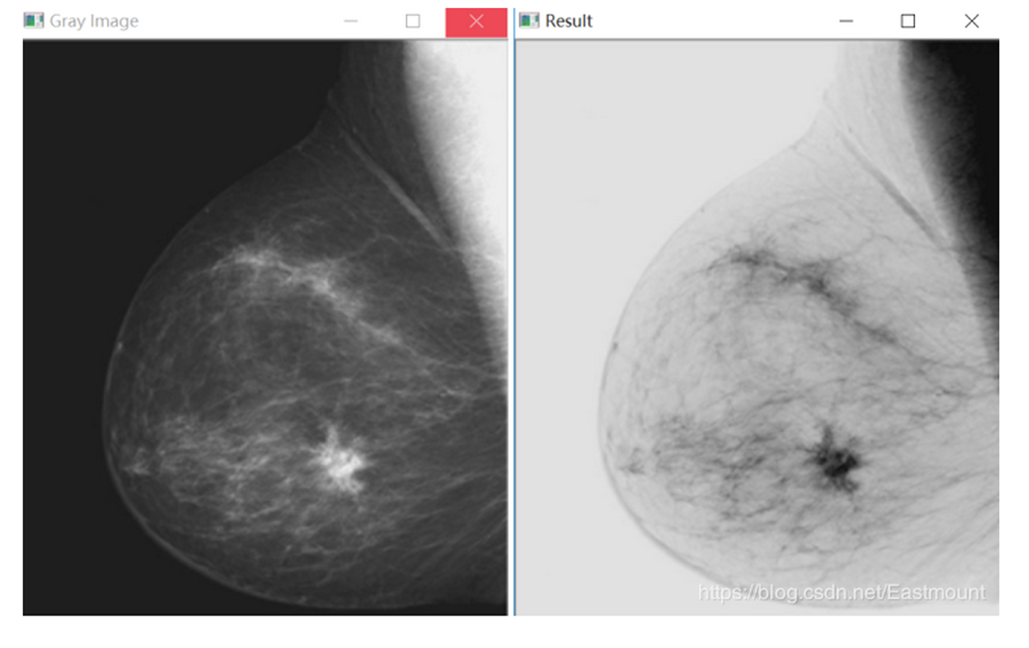